# Explore the dataset

In [2]:
# Libraries Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read Data File
Full_Cars_Data = pd.read_csv('cars.csv')
Full_Cars_Data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [4]:
# Remove the 'carID' column as it's likely not needed for analysis
Full_Cars_Data = Full_Cars_Data.drop(columns= ['carID'] )

In [5]:
Full_Cars_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4942 non-null   object 
 1   model         4960 non-null   object 
 2   year          4960 non-null   int64  
 3   transmission  4960 non-null   object 
 4   mileage       4954 non-null   float64
 5   fuelType      4943 non-null   object 
 6   tax           4960 non-null   int64  
 7   mpg           4948 non-null   float64
 8   engineSize    4952 non-null   float64
 9   price         4960 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 387.6+ KB


In [6]:
Full_Cars_Data.describe()

,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4954.000000,4960.000000,4948.000000,4952.000000,4960.000000
mean,2016.737903,24949.957812,152.332661,50.390158,2.123425,23469.943750
std,2.884035,24451.380600,82.403844,35.781756,0.786778,16406.714563
min,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,2016.000000,5622.500000,145.000000,38.700000,1.600000,12000.000000
50%,2017.000000,18971.500000,145.000000,47.100000,2.000000,18999.000000
75%,2019.000000,36692.750000,150.000000,54.300000,2.800000,30335.750000
max,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [7]:
Full_Cars_Data.describe( include = 'object' )

,brand,model,transmission,fuelType
count,4942,4960,4960,4943
unique,9,90,4,5
top,merc,Arteon,Manual,Diesel
freq,789,167,1948,2981


In [8]:
Full_Cars_Data.isnull().sum()

brand           18
model            0
year             0
transmission     0
mileage          6
fuelType        17
tax              0
mpg             12
engineSize       8
price            0
dtype: int64

In [9]:
duplicates = Full_Cars_Data[Full_Cars_Data.duplicated()]
# Count the number of duplicated rows
num_duplicates = Full_Cars_Data.duplicated().sum()
num_duplicates

30

In [10]:
# Fill missing values for 'brand' with the most frequent value (mode)
Full_Cars_Data['brand'] = Full_Cars_Data['brand'].fillna(Full_Cars_Data['brand'].mode()[0])

# Fill missing values for 'mileage' with the mean value
Full_Cars_Data['mileage'] = Full_Cars_Data['mileage'].fillna(Full_Cars_Data['mileage'].mean())

# Fill missing values for 'fuelType' with the most frequent value (mode)
Full_Cars_Data['fuelType'] = Full_Cars_Data['fuelType'].fillna(Full_Cars_Data['fuelType'].mode()[0])

# Fill missing values for 'mpg' with the mean value
Full_Cars_Data['mpg'] = Full_Cars_Data['mpg'].fillna(Full_Cars_Data['mpg'].mean())

# Fill missing values for 'engineSize' with the mean value
Full_Cars_Data['engineSize'] = Full_Cars_Data['engineSize'].fillna(Full_Cars_Data['engineSize'].mean())


In [11]:
Full_Cars_Data.isnull().sum()


brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [12]:
# Unique values in the 'brand' column
unique_brands = Full_Cars_Data['brand'].unique()
print("Unique brands:", unique_brands)

Unique brands: ['hyundi' 'vauxhall' 'audi' 'vw' 'skoda' 'merc' 'toyota' 'bmw' 'ford']


In [13]:
# Unique values in the 'model' column
unique_models = Full_Cars_Data['model'].unique()
print("Unique models:", unique_models)


Unique models: [' Santa Fe' ' GTC' ' RS4' ' Scirocco' ' Scala' ' V Class' ' Prius' ' M4'
 ' Camry' ' KA' ' Vivaro' ' CLS Class' ' Caravelle' ' Arteon' ' Shuttle'
 ' I40' ' IX20' ' 6 Series' ' GL Class' ' S Class' ' S3' ' Yeti' ' Galaxy'
 ' Puma' ' Edge' ' A8' ' SLK' ' Kamiq' ' RS6' ' CLA Class' ' Land Cruiser'
 ' M Class' ' Q8' ' i3' ' Verso' ' Mustang' ' IX35' ' Amarok' ' Avensis'
 ' Grand Tourneo Connect' ' Antara' ' Tourneo Connect' ' Beetle' ' X4'
 ' CC' ' GT86' ' X-CLASS' ' I800' ' i8' ' Caddy Maxi Life' ' Combo Life'
 ' Rapid' ' SQ7' ' Grand C-MAX' ' Tourneo Custom' ' California' ' Agila'
 ' A7' ' Zafira Tourer' ' G Class' ' Tiguan Allspace' ' X6' ' M2' ' X7'
 ' 7 Series' ' Z4' ' RS5' ' Hilux' ' GLS Class' ' GLB Class' ' M5' ' RS3'
 ' Caddy Life' ' SQ5' ' Supra' ' 8 Series' ' Fusion' ' M6' ' M3' ' Jetta'
 ' S4' ' R8' ' PROACE VERSO' ' Caddy' ' Getz' ' Eos' ' CLK' ' IQ' ' Z3'
 ' Roomster']


In [14]:
# Unique values in the 'transmission' column
unique_transmissions = Full_Cars_Data['transmission'].unique()
print("Unique transmissions:", unique_transmissions)

Unique transmissions: ['Semi-Auto' 'Manual' 'Automatic' 'Other']


In [15]:
# Unique values in the 'fuelType' column
unique_fuel_types = Full_Cars_Data['fuelType'].unique()
print("Unique fuel types:", unique_fuel_types)

Unique fuel types: ['Diesel' 'Petrol' 'Hybrid' 'Other' 'Electric']


In [16]:
# Get the mode of the 'transmission' column
most_frequent_transmission = Full_Cars_Data['transmission'].mode()[0]

# Replace 'Other' with the most frequent value
Full_Cars_Data['transmission'] = Full_Cars_Data['transmission'].replace('Other', most_frequent_transmission)

# Verify the change
print(Full_Cars_Data['transmission'].unique())

['Semi-Auto' 'Manual' 'Automatic']


In [17]:
# Get the mode of the 'fuelType' column
most_frequent_transmission = Full_Cars_Data['fuelType'].mode()[0]

# Remove rows where 'fuelType' is 'Other'
Full_Cars_Data = Full_Cars_Data[Full_Cars_Data['fuelType'] != 'Other']

# Verify the change by displaying unique values in 'fuelType'
print(Full_Cars_Data['fuelType'].unique())

['Diesel' 'Petrol' 'Hybrid' 'Electric']


In [18]:
Full_Cars_Data.drop_duplicates(inplace=True)

In [19]:
Full_Cars_Data['price'] = Full_Cars_Data['price'].astype(float)

In [20]:
Full_Cars_Data['brand'] = Full_Cars_Data['brand'].str.strip().str.lower()

In [21]:
# Calculate Q1 and Q3 for 'engineSize'
Q1_engine = Full_Cars_Data['engineSize'].quantile(0.25)
Q3_engine = Full_Cars_Data['engineSize'].quantile(0.75)
IQR_engine = Q3_engine - Q1_engine

# Define lower and upper bounds for 'engineSize'
lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

# Remove outliers from 'engineSize'
Full_Cars_Data = Full_Cars_Data[(Full_Cars_Data['engineSize'] >= lower_bound_engine) & (Full_Cars_Data['engineSize'] <= upper_bound_engine)]
Full_Cars_Data.describe()

,year,mileage,tax,mpg,engineSize,price
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,2016.729283,25140.437228,150.724323,50.109151,2.086751,23032.828270
std,2.873068,24499.077008,78.246579,32.515547,0.705105,15513.801771
min,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,2016.000000,5775.500000,145.000000,38.700000,1.600000,11995.000000
50%,2017.000000,19169.000000,145.000000,47.900000,2.000000,18990.000000
75%,2019.000000,36777.500000,150.000000,54.300000,2.500000,29995.000000
max,2020.000000,259000.000000,580.000000,470.800000,4.500000,139995.000000


In [22]:
# Calculate the mean of 'engineSize' excluding zeros
mean_engine_size = Full_Cars_Data[Full_Cars_Data['engineSize'] > 0]['engineSize'].mean()

# Replace values of 0 in 'engineSize' with the calculated mean
Full_Cars_Data['engineSize'] = Full_Cars_Data['engineSize'].replace(0, mean_engine_size)

Full_Cars_Data.describe()

,year,mileage,tax,mpg,engineSize,price
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,2016.729283,25140.437228,150.724323,50.109151,2.101517,23032.828270
std,2.873068,24499.077008,78.246579,32.515547,0.682902,15513.801771
min,1997.000000,1.000000,0.000000,2.800000,1.000000,450.000000
25%,2016.000000,5775.500000,145.000000,38.700000,1.600000,11995.000000
50%,2017.000000,19169.000000,145.000000,47.900000,2.000000,18990.000000
75%,2019.000000,36777.500000,150.000000,54.300000,2.500000,29995.000000
max,2020.000000,259000.000000,580.000000,470.800000,4.500000,139995.000000


# Feature Engineering

In [24]:
# Create a new feature for Car Age
Full_Cars_Data['car_age'] = 2024 - Full_Cars_Data['year']
Full_Cars_Data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,car_age
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995.0,5
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700.0,9
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990.0,5
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999.0,8
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990.0,4


In [25]:
# Create a new feature for Mile Per Age
Full_Cars_Data['mile_per_age'] =  Full_Cars_Data['mileage'] / Full_Cars_Data['car_age']
Full_Cars_Data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,car_age,mile_per_age
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995.0,5,844.600000
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700.0,9,5318.888889
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990.0,5,1030.200000
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999.0,8,2552.875000
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990.0,4,892.250000


# Data visualization

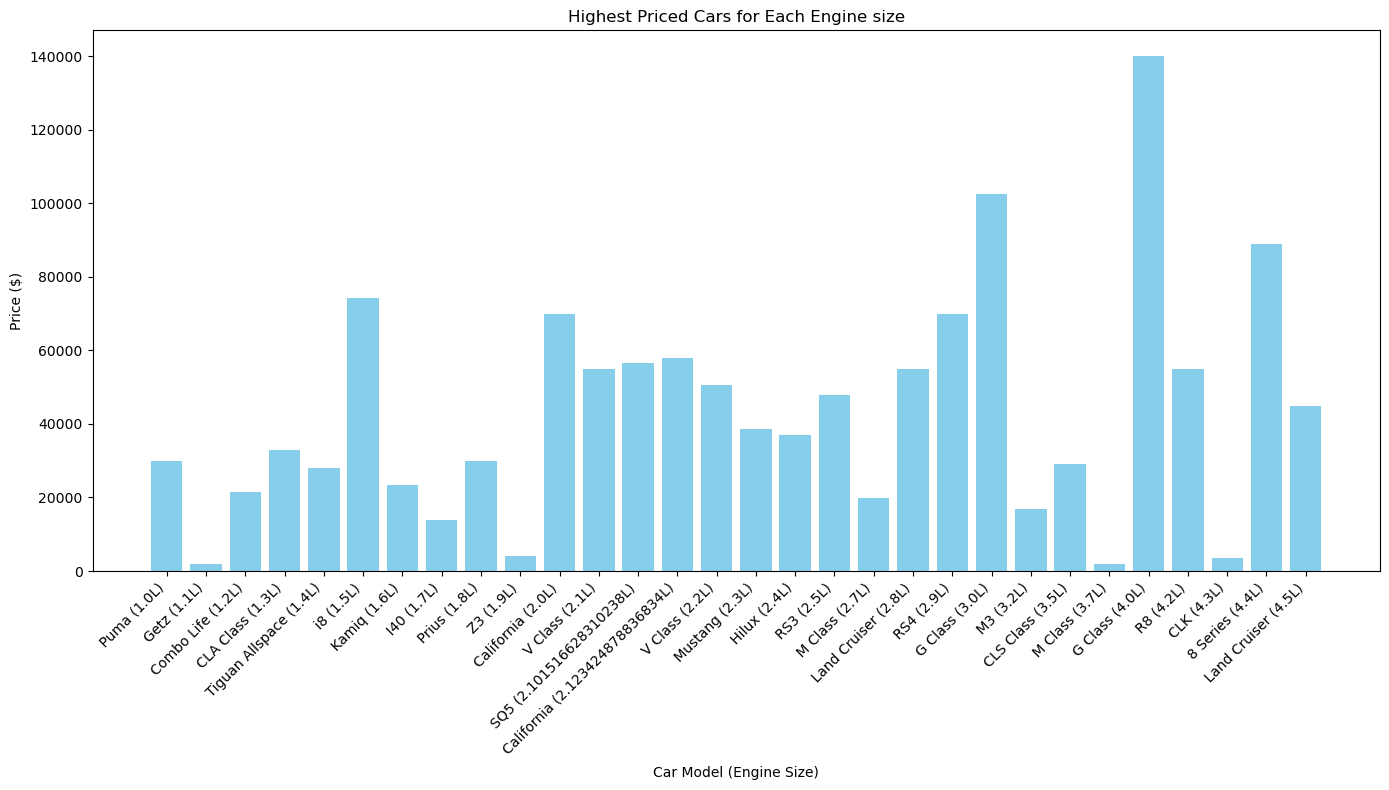

In [27]:
# Highest priced cars for each engine size
highest_price_per_engine = Full_Cars_Data.loc[Full_Cars_Data.groupby('engineSize')['price'].idxmax()]

# Combine 'engineSize' and 'model' for clearer x-axis labels
highest_price_per_engine['car_info'] = highest_price_per_engine['model'] + ' (' + highest_price_per_engine['engineSize'].astype(str) + 'L)'

# Plot
plt.figure(figsize=(14, 8))
plt.bar(highest_price_per_engine['car_info'], highest_price_per_engine['price'], color='skyblue')
plt.title('Highest Priced Cars for Each Engine size')
plt.xlabel('Car Model (Engine Size)')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()

plt.show()

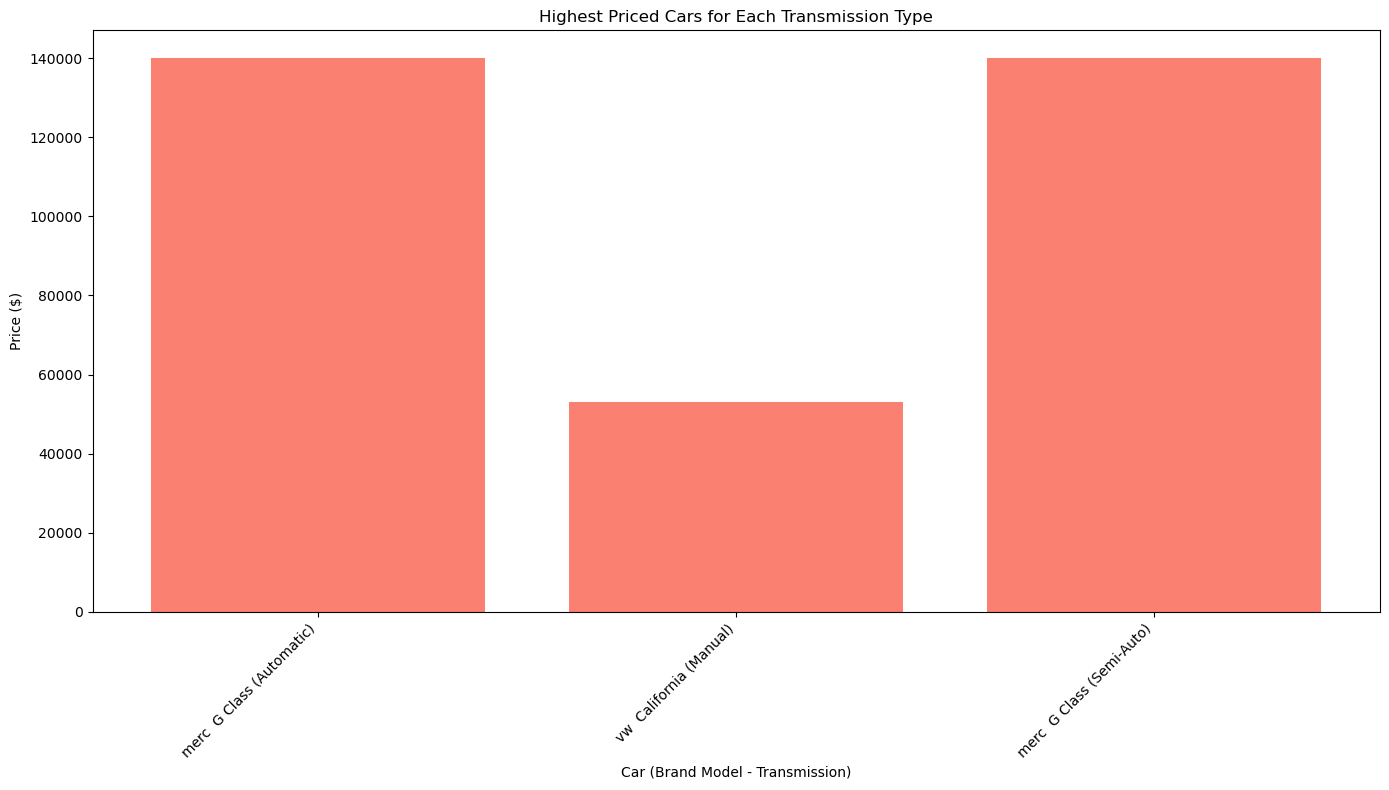

In [28]:
# Highest priced cars for each transmission type
highest_price_per_transmission = Full_Cars_Data.loc[Full_Cars_Data.groupby('transmission')['price'].idxmax()]

# Combine 'brand', 'model', and 'transmission' for clearer x-axis labels
highest_price_per_transmission['car_info'] = highest_price_per_transmission['brand'] + ' ' + highest_price_per_transmission['model'] + ' (' + highest_price_per_transmission['transmission'] + ')'

# Plot
plt.figure(figsize=(14, 8))
plt.bar(highest_price_per_transmission['car_info'], highest_price_per_transmission['price'], color='salmon')
plt.title('Highest Priced Cars for Each Transmission Type')
plt.xlabel('Car (Brand Model - Transmission)')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

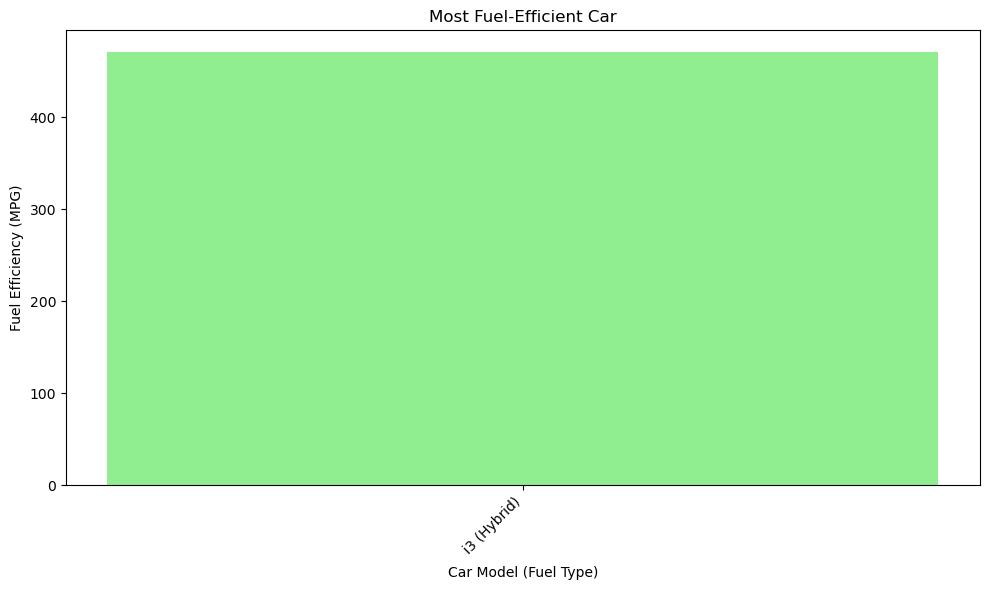

In [29]:

# Most fuel-efficient car (highest MPG)
most_fuel_efficient = Full_Cars_Data.loc[Full_Cars_Data['mpg'].idxmax()]

# Combine 'fuelType' and 'model' for clearer x-axis labels
most_fuel_efficient_info = most_fuel_efficient['model'] + ' (' + most_fuel_efficient['fuelType'] + ')'

# Plot the most fuel-efficient car
plt.figure(figsize=(10, 6))
plt.bar(most_fuel_efficient_info, most_fuel_efficient['mpg'], color='lightgreen')
plt.title('Most Fuel-Efficient Car')
plt.xlabel('Car Model (Fuel Type)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()

plt.show()


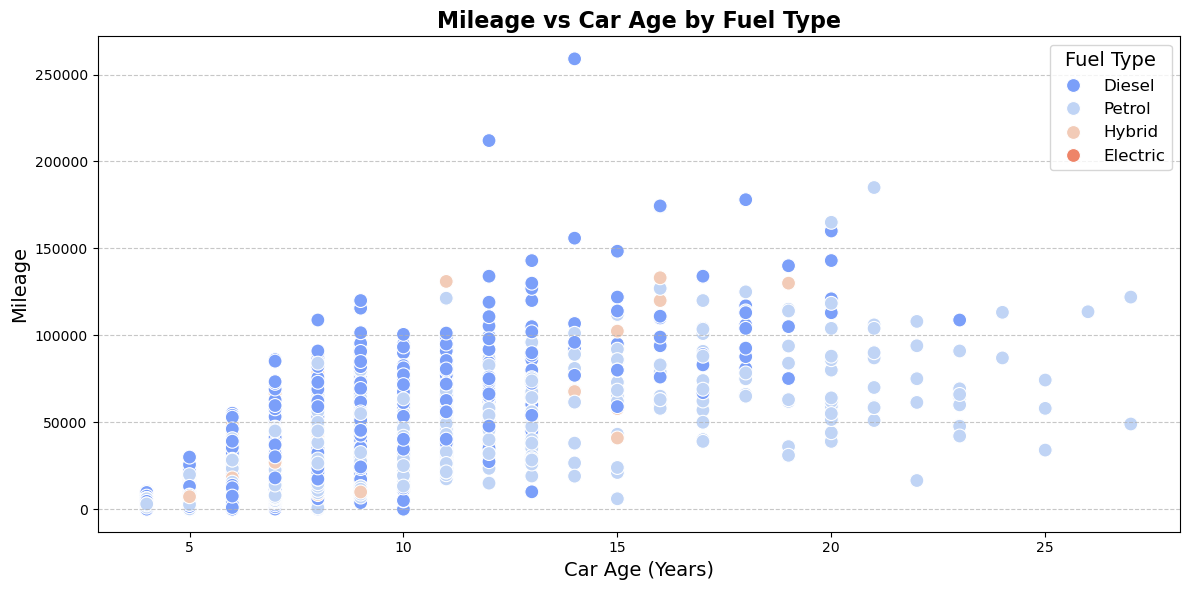

In [30]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=Full_Cars_Data, x='car_age', y='mileage', hue='fuelType', palette='coolwarm', s=100)
plt.title('Mileage vs Car Age by Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Car Age (Years)', fontsize=14)
plt.ylabel('Mileage', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Fuel Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

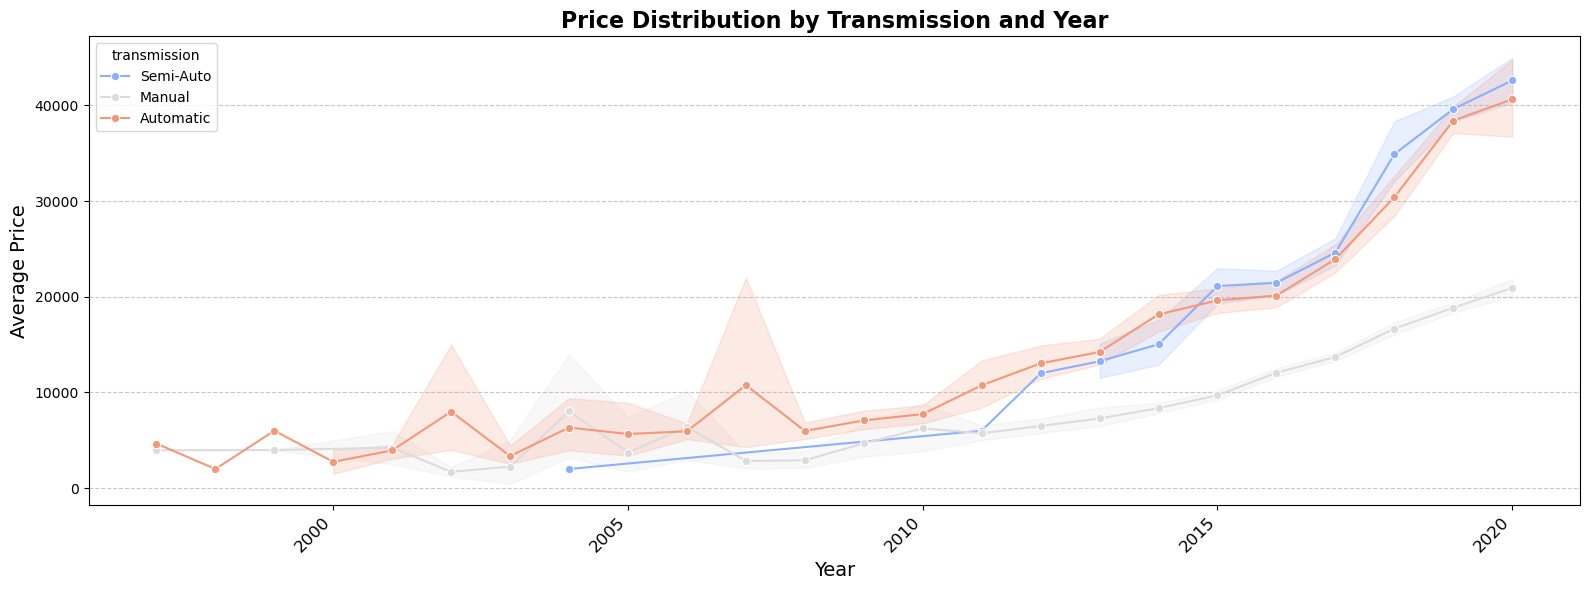

In [31]:
plt.figure(figsize=(16, 6)) 
sns.lineplot(data=Full_Cars_Data, x='year', y='price', hue='transmission', palette='coolwarm', marker='o')
plt.title('Price Distribution by Transmission and Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14) 
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

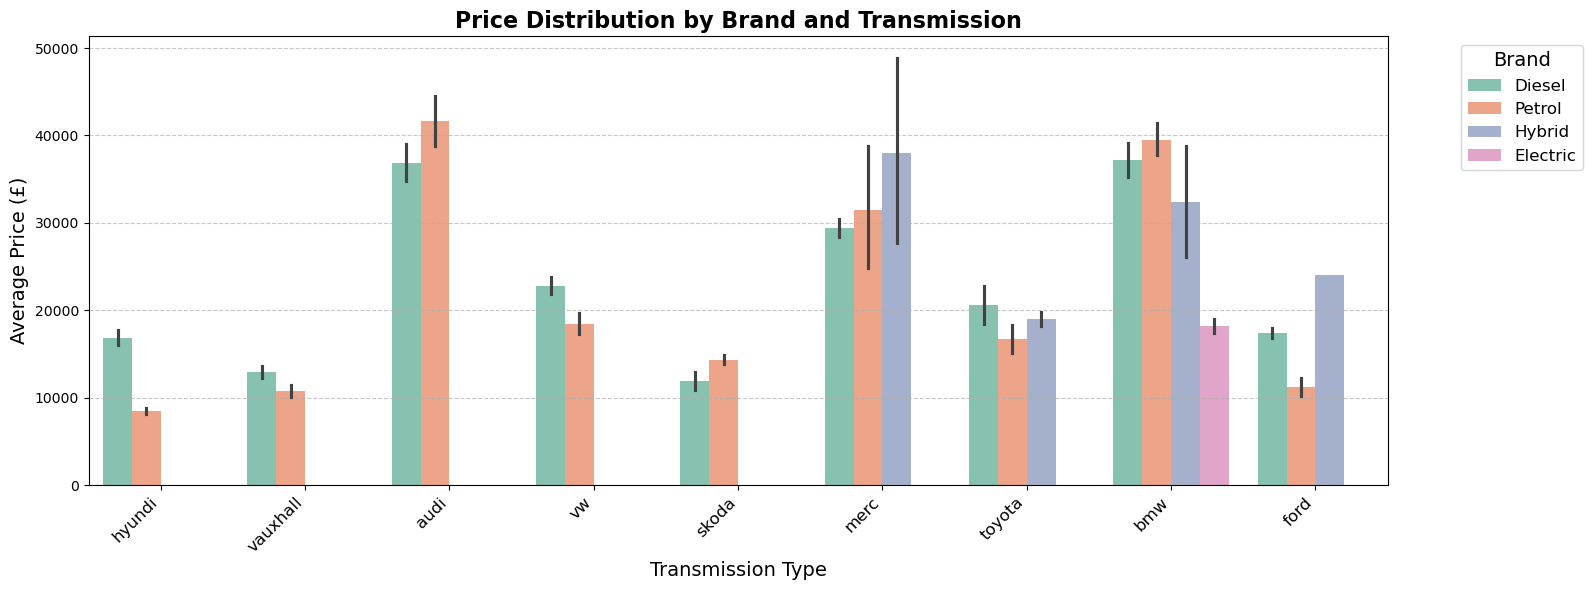

In [32]:
plt.figure(figsize=(16, 6)) 
sns.barplot(data=Full_Cars_Data, x='brand', y='price', hue='fuelType', palette='Set2', alpha=0.85)
plt.title('Price Distribution by Brand and Transmission', fontsize=16, fontweight='bold')
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Average Price (£)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='14')
plt.tight_layout()
plt.show()

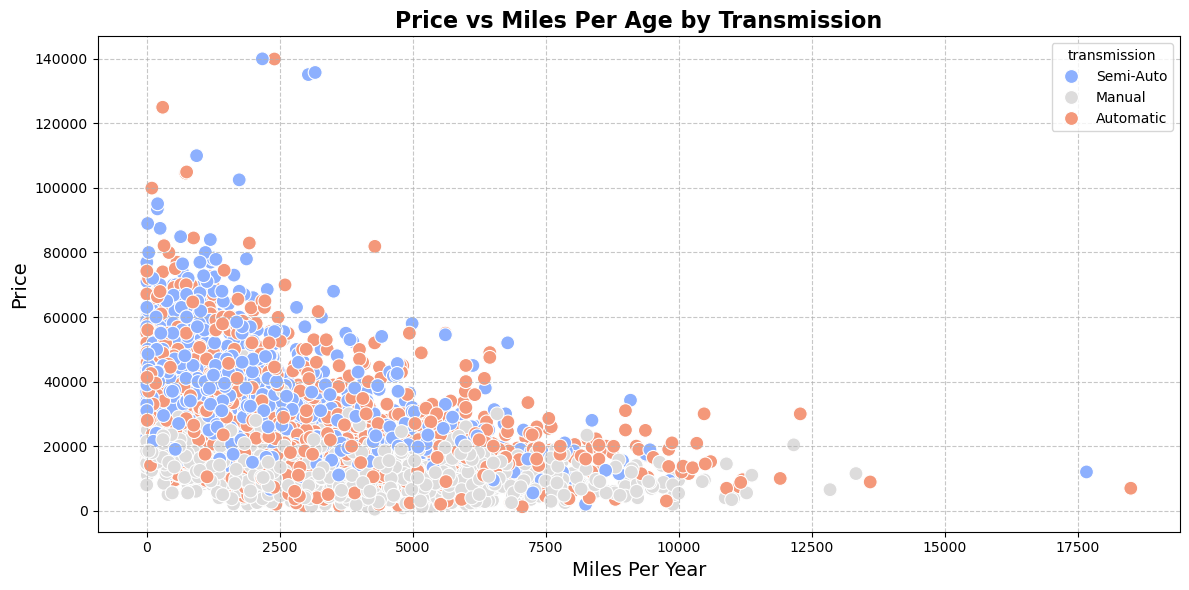

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Full_Cars_Data, x='mile_per_age', y='price', hue='transmission', palette='coolwarm', s=100)
plt.title('Price vs Miles Per Age by Transmission', fontsize=16, fontweight='bold')
plt.xlabel('Miles Per Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


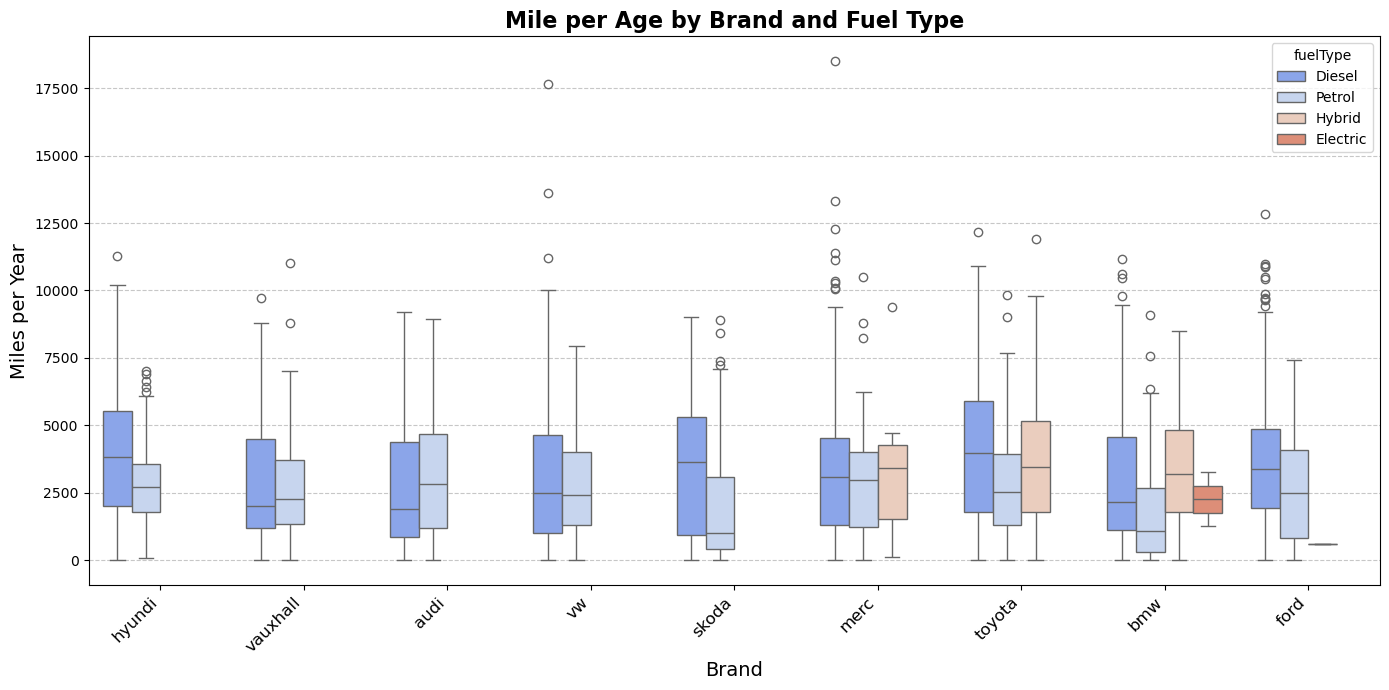

In [34]:
# Boxplot for Brand vs Mile per Age with hue for Fuel Type
plt.figure(figsize=(14, 7))

# Create a boxplot with hue for 'fuelType'
sns.boxplot(data=Full_Cars_Data, x='brand', y='mile_per_age', hue='fuelType', palette='coolwarm')

# Add title and axis labels
plt.title('Mile per Age by Brand and Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Miles per Year', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid lines for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
Full_Cars_Data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,car_age,mile_per_age
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995.0,5,844.600000
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700.0,9,5318.888889
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990.0,5,1030.200000
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999.0,8,2552.875000
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990.0,4,892.250000


In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
Full_Cars_Data['brand'] = label_encoder.fit_transform(Full_Cars_Data['brand'])
Full_Cars_Data['model'] = label_encoder.fit_transform(Full_Cars_Data['model'])
Full_Cars_Data['fuelType'] = label_encoder.fit_transform(Full_Cars_Data['fuelType'])
Full_Cars_Data['transmission'] = label_encoder.fit_transform(Full_Cars_Data['transmission'])
Full_Cars_Data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,car_age,mile_per_age
0,3,69,2019,2,4223.0,0,145,39.8,2.2,31995.0,5,844.600000
1,7,30,2015,1,47870.0,0,125,60.1,2.0,7700.0,9,5318.888889
2,0,58,2019,0,5151.0,3,145,29.1,2.9,58990.0,5,1030.200000
3,8,71,2016,0,20423.0,0,30,57.6,2.0,12999.0,8,2552.875000
4,5,70,2020,2,3569.0,3,145,47.1,1.0,16990.0,4,892.250000


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numerical columns to normalize (excluding categorical columns)
numerical_columns = ['mileage', 'tax', 'mpg', 'engineSize', 'model', 'car_age', 'mile_per_age', 'year', 'brand']

# Apply MinMaxScaler to the numerical columns
Full_Cars_Data[numerical_columns] = scaler.fit_transform(Full_Cars_Data[numerical_columns])
Full_Cars_Data.head()


,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,car_age,mile_per_age
0,0.375,0.775281,0.956522,2,0.016301,0,0.250000,0.079060,0.342857,31995.0,0.043478,0.045649
1,0.875,0.337079,0.782609,1,0.184823,0,0.215517,0.122436,0.285714,7700.0,0.217391,0.287504
2,0.000,0.651685,0.956522,0,0.019884,3,0.250000,0.056197,0.542857,58990.0,0.043478,0.055681
3,1.000,0.797753,0.826087,0,0.078850,0,0.051724,0.117094,0.285714,12999.0,0.173913,0.137989
4,0.625,0.786517,1.000000,2,0.013776,3,0.250000,0.094658,0.000000,16990.0,0.000000,0.048225


In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Define the independent variables (X) and the dependent variable (y)
X = Full_Cars_Data[['mileage', 'tax', 'mpg', 'engineSize', 'car_age', 'mile_per_age', 'brand', 'fuelType', 'transmission']]
y = Full_Cars_Data['price']

# Apply SelectKBest to select the top 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Display the selected features
"Selected Features:", selected_features


('Selected Features:',
 Index(['mileage', 'engineSize', 'car_age', 'mile_per_age', 'brand'], dtype='object'))

In [41]:
# استيراد المكتبات اللازمة
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# تحديد المتغيرات المستقلة (X) والمتغير التابع (y)
X = Full_Cars_Data[['mileage', 'tax', 'mpg', 'engineSize', 'car_age', 'mile_per_age', 
                     'brand', 'fuelType', 'transmission']]
y = Full_Cars_Data['price']

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تهيئة نموذج Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# تدريب النموذج على مجموعة التدريب
rf_model.fit(X_train, y_train)

# إجراء التنبؤات على مجموعة الاختبار
y_pred = rf_model.predict(X_test)

# تقييم النموذج باستخدام Mean Absolute Error بدلاً من Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# عرض مقاييس الأداء
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Absolute Error: 2134.03
R^2 Score: 0.94


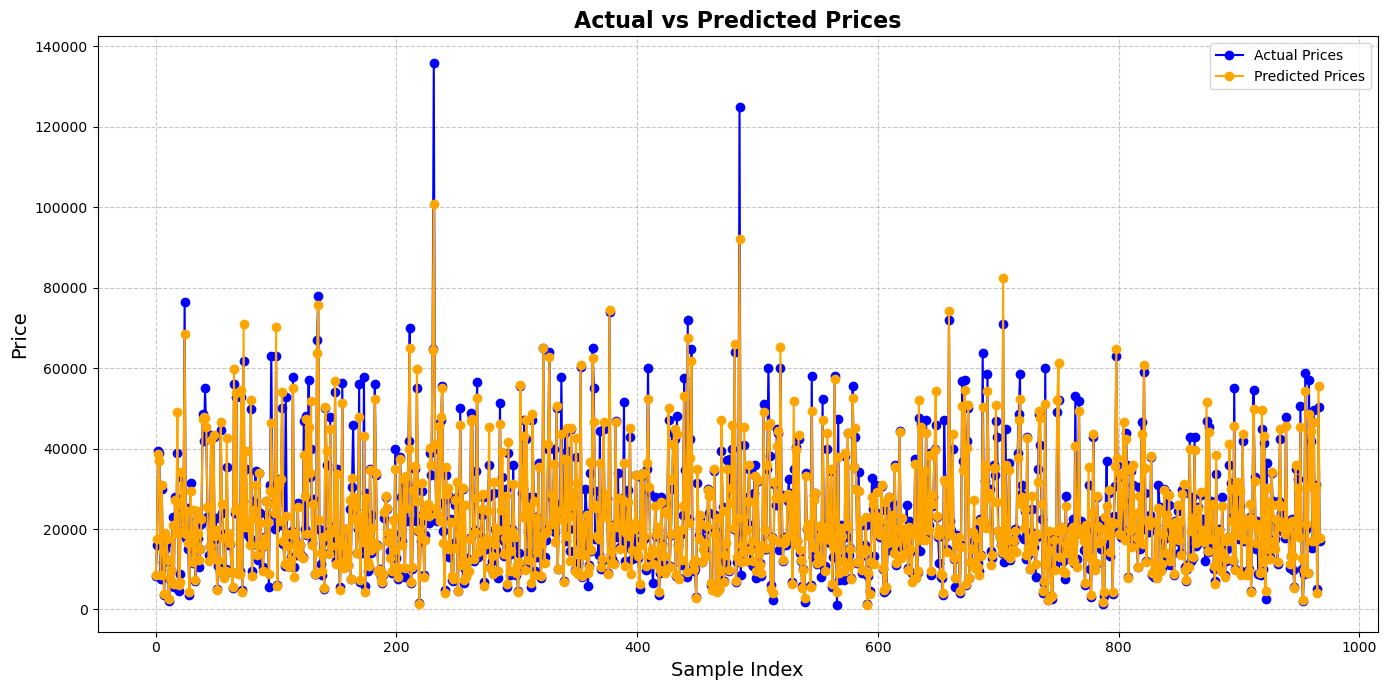

In [42]:
import matplotlib.pyplot as plt

# Create a line plot to compare actual vs predicted prices
plt.figure(figsize=(14, 7))

# Plotting the actual values
plt.plot(y_test.values, label='Actual Prices', color='blue', marker='o')

# Plotting the predicted values
plt.plot(y_pred, label='Predicted Prices', color='orange', marker='o')

# Adding title and labels
plt.title('Actual vs Predicted Prices', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adding a legend
plt.legend()

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
